In [1]:
import gym
import time

from IPython import display

import gym_wumpus
from gym_wumpus.envs import WumpusEnv

from gym import envs, error, make

from modules.hunt_wumpus_custom_qlearning_agent import HuntWumpusCustomQLearningAgent

In [2]:
#example 2: with a custom world configuration
gym.envs.register(
    id='wumpus-custom-v1',
    entry_point='gym_wumpus.envs:wumpusenv_from_dict',
    max_episode_steps=100,
    nondeterministic=False,
    kwargs={
        'desc': {
            "id": "wumpus-custom-v1",
            "size": [6, 6],
            "hunters": [[0, 0, "N"]],
            "pits": [[4, 4], [1, 2], [0, 5], [5, 1], [3, 1], [3, 3], [2, 2], [4, 3], [3, 5], [5, 2]],
            "wumpuses": [[5, 4]],
            "golds": [[5, 3]]
        }
    }
)

wumpus_env = gym.make('wumpus-custom-v1')

In [3]:
wumpus_env.reset()

wumpus_env.render('human')

qlearning_agent = HuntWumpusCustomQLearningAgent(wumpus_env)

q_table, train_rewards = qlearning_agent.train(episodes=100_000, alpha=0.2, gamma=0.8)

┌───┬───┬───┬───┬───┬───┐
│  P│   │   │  P│   │   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │  P│W  │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│  P│ G │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │  P│  P│   │   │  P│
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│   │  P│
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │
│ @^│   │   │   │   │   │
└───┴───┴───┴───┴───┴───┘
Running episode: 0
Running episode: 10000
Running episode: 20000
Running episode: 30000
Running episode: 40000
Running episode: 50000
Running episode: 60000
Running episode: 70000
Running episode: 80000
Running episode: 90000


Training plot



<AxesSubplot:xlabel='Episode', ylabel='Total Reward'>

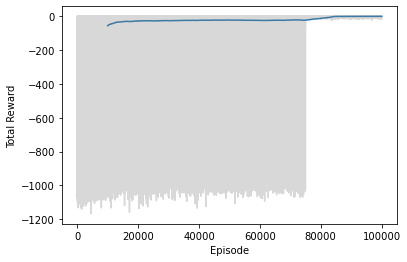

In [4]:
from modules.utils import training_plot

print("Training plot")
print("")

training_plot(train_rewards)

In [5]:
reward, frames = qlearning_agent.run_episode()

for frame in frames:
    display.clear_output(wait=True)
    print(frame)
    time.sleep(0.1)
    
print(f"final reward: {reward}")

┌───┬───┬───┬───┬───┬───┐
│  P│   │   │  P│   │   │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │  P│W  │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│  P│ G │
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │  P│  P│   │   │  P│
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │  P│   │  P│
│   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │
│ @^│   │   │   │   │   │
└───┴───┴───┴───┴───┴───┘
final reward: -1.0
